## Import all the required libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

import warnings
warnings.filterwarnings("ignore")

## load the full and clean data from computer and then show ( print that data)

In [79]:
data=pd.read_csv('full and clean data.csv')

In [81]:
data

,Compressive strength of cement fce(MPa),Tensile strength of cement fct(MPa),Curing age(day),Dmax of Crushed stone(mm),Stone powder content in Sand (%),Fineness modulus of sand,W/B,Water to cement ratio mw/mc,Water(kg/m3),cements kgs,Sand ratio (%),Slump (mm),"Compressive strength fcu,t (MPa)","Splitting tensile strength fst,t(MPa)"
0,46.80,8.000000,3.0,31.5,5.0,3.340000,0.56,0.56,180.00,321.428571,44.0,50.0,32.50,1.18
1,46.80,8.000000,3.0,31.5,9.0,3.270000,0.56,0.56,180.00,321.428571,44.0,70.0,28.70,1.13
2,46.80,8.000000,3.0,31.5,13.0,2.770000,0.56,0.56,180.00,321.428571,44.0,50.0,28.50,1.56
3,46.80,8.000000,7.0,31.5,5.0,3.340000,0.56,0.56,180.00,321.428571,44.0,50.0,33.50,1.39
4,46.80,8.000000,7.0,31.5,9.0,3.270000,0.56,0.56,180.00,321.428571,44.0,70.0,34.90,1.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,48.07,8.309271,28.0,12.0,19.2,2.938247,0.36,0.55,178.75,325.000000,54.0,140.0,46.85,4.25
710,48.07,8.309271,90.0,12.0,19.2,2.938247,0.36,0.55,178.75,325.000000,54.0,140.0,60.65,4.59
711,48.07,8.309271,7.0,12.0,19.2,2.938247,0.32,0.45,180.00,400.000000,54.0,140.0,47.71,3.75
712,48.07,8.309271,28.0,12.0,19.2,2.938247,0.32,0.45,180.00,400.000000,54.0,140.0,65.37,4.69


## the following cell will describe the data

In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Compressive strength of cement fce(MPa),714.0,50.350497,5.471612,35.50,46.800000,50.350497,51.700000,63.400000
Tensile strength of cement fct(MPa),714.0,8.309271,0.515302,6.90,8.000000,8.309271,8.400000,10.800000
Curing age(day),714.0,56.729692,76.281596,1.00,28.000000,28.000000,80.500000,388.000000
Dmax of Crushed stone(mm),714.0,43.870399,25.071295,12.00,25.000000,31.500000,43.870399,120.000000
Stone powder content in Sand (%),714.0,10.831617,6.159194,0.00,6.100000,10.831617,13.000000,40.000000
Fineness modulus of sand,714.0,2.938247,0.251405,2.20,2.800000,2.938247,3.100000,3.550000
W/B,714.0,0.454859,0.116213,0.24,0.380000,0.450000,0.500000,1.000000
Water to cement ratio mw/mc,714.0,0.593051,0.240125,0.30,0.440000,0.500000,0.670000,1.430000
Water(kg/m3),714.0,148.361626,38.819383,71.00,114.000000,156.500000,180.000000,291.000000
cements kgs,714.0,282.528307,155.309219,0.00,164.179104,321.428571,400.000000,676.744186


## for ploting the heatmap

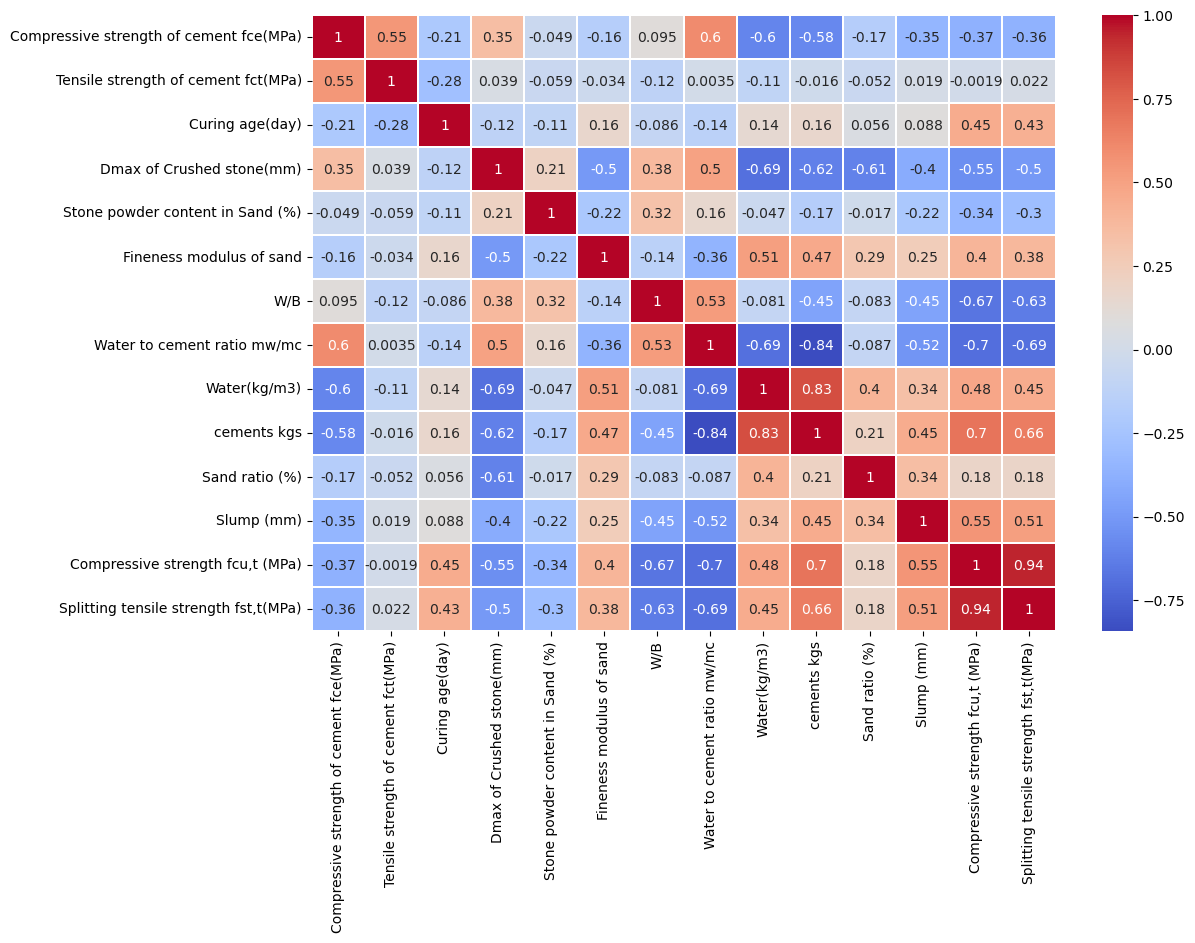

In [89]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.3)

# Show the plot
plt.show()

## for plotting all the dependencies graphs

Blue plots are for the relation with Compressive strength fcu,t (MPa)
Orange plots are for the relation with Splitting tensile strength fst,t(MPa)



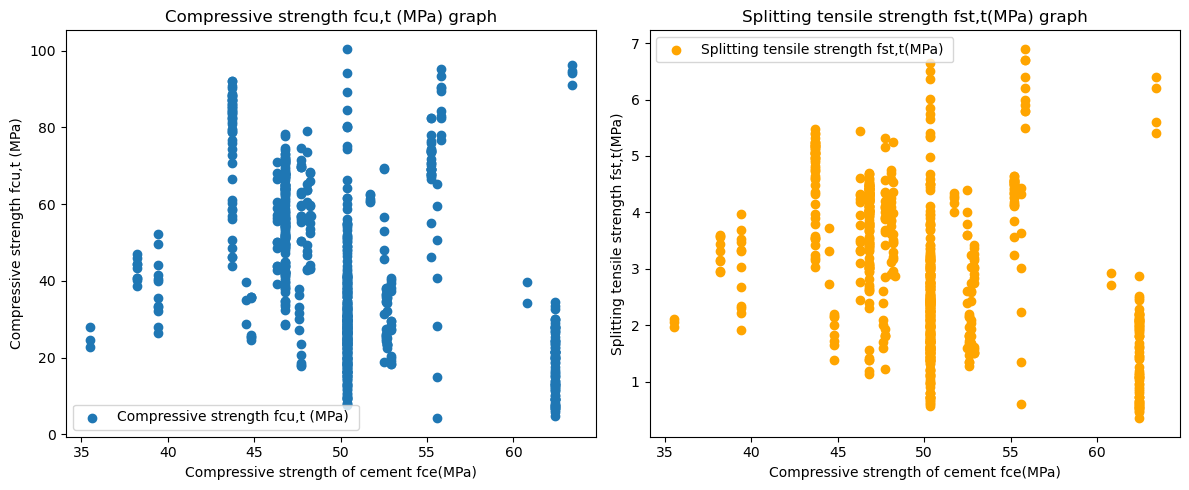

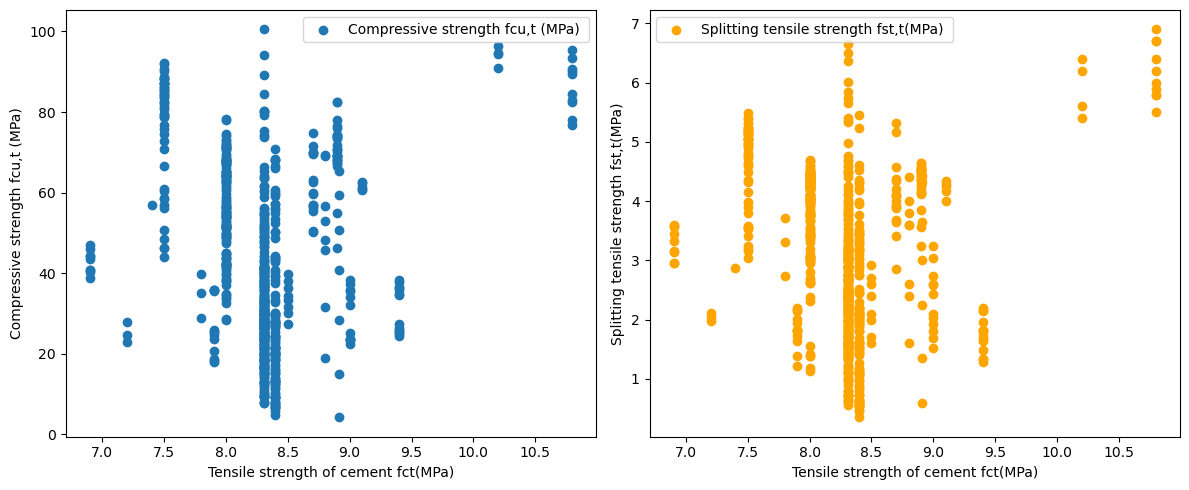

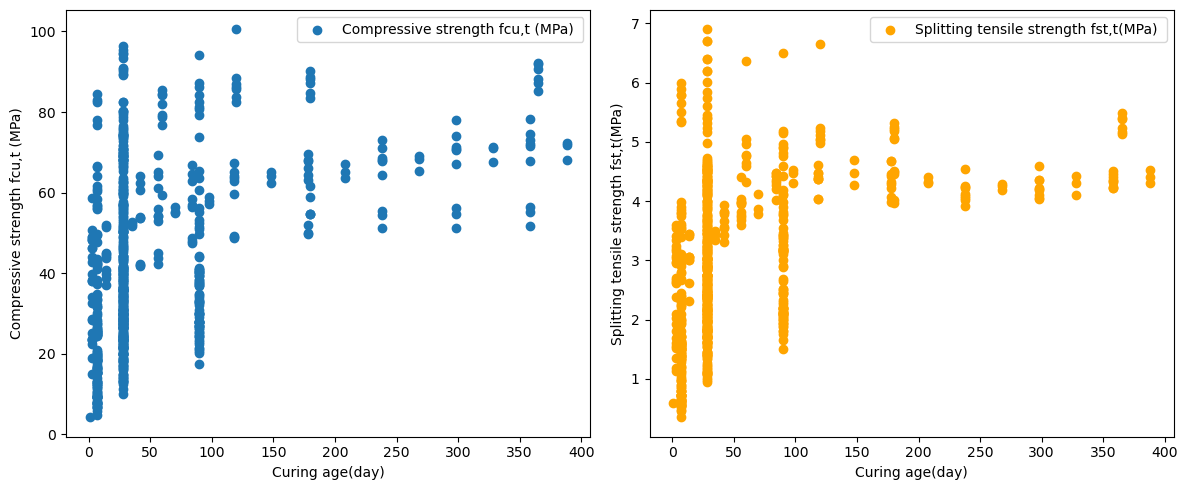

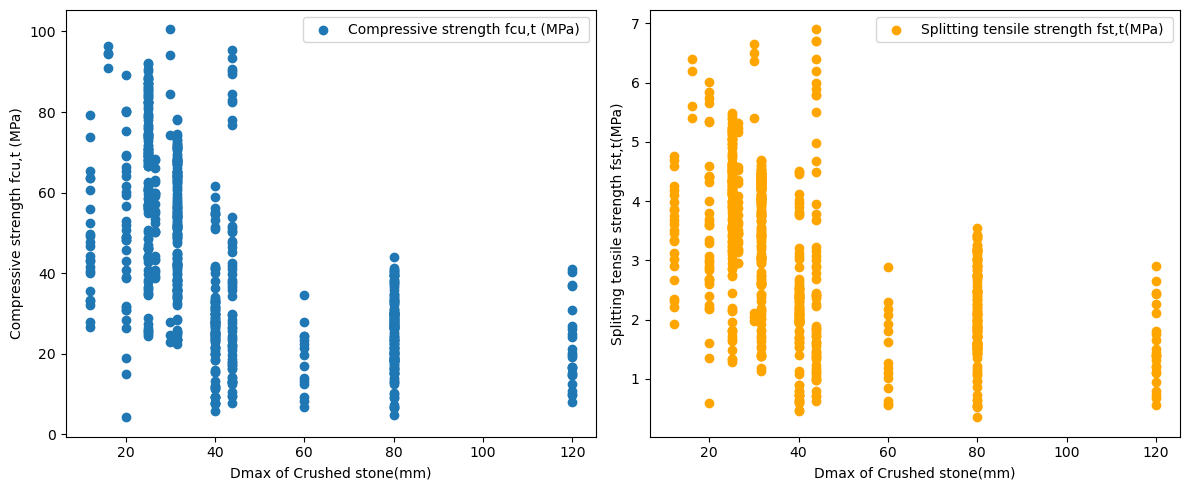

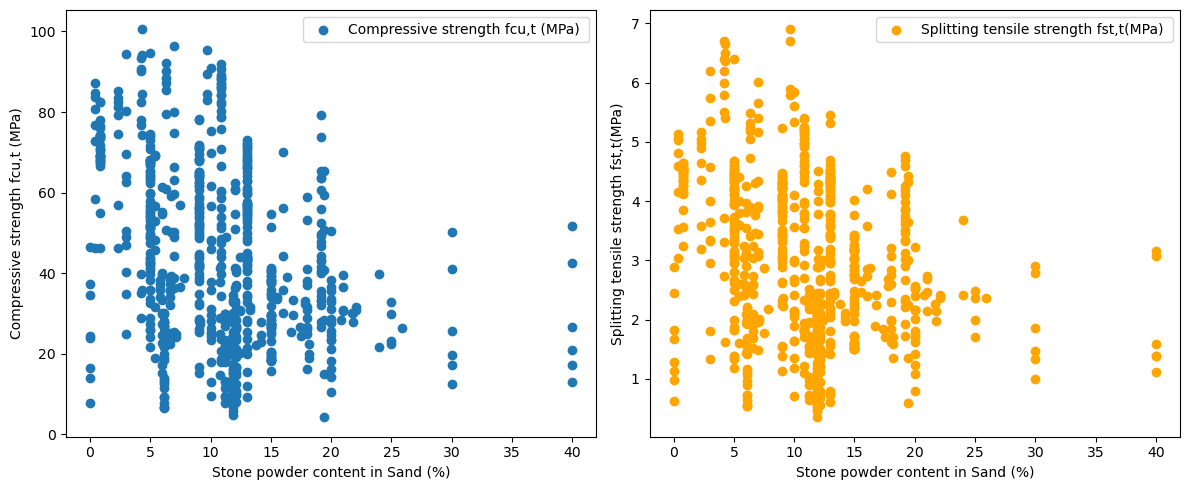

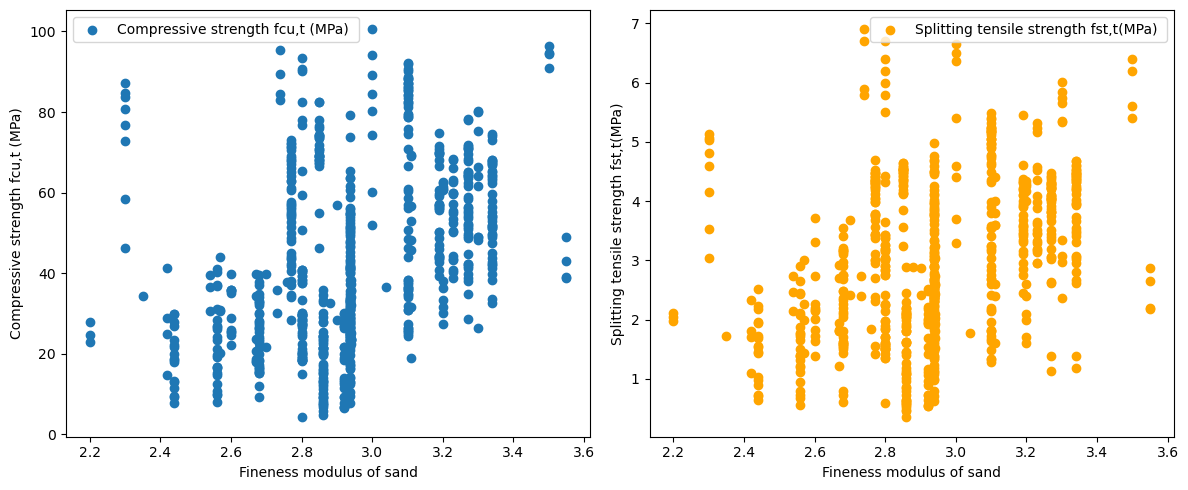

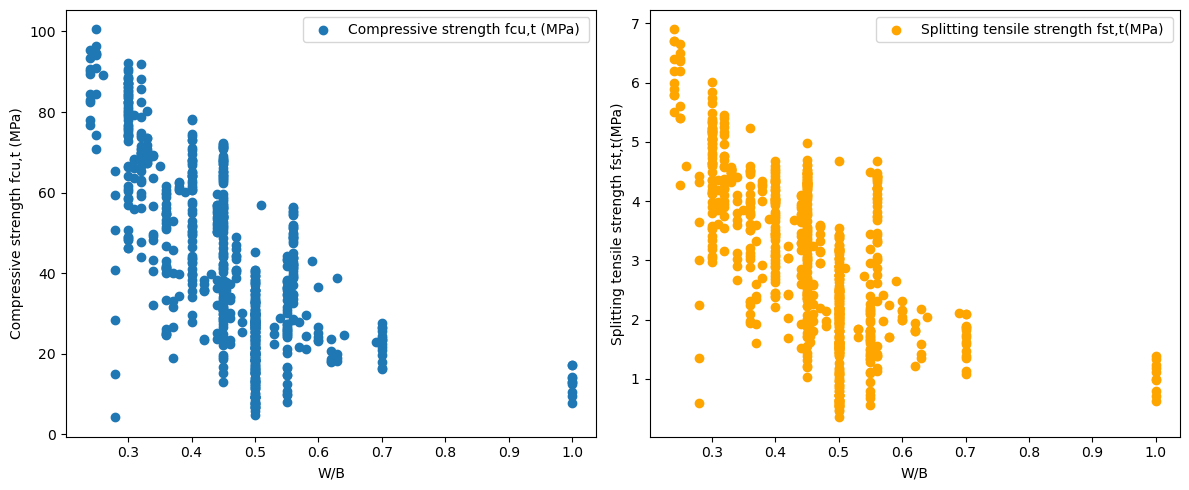

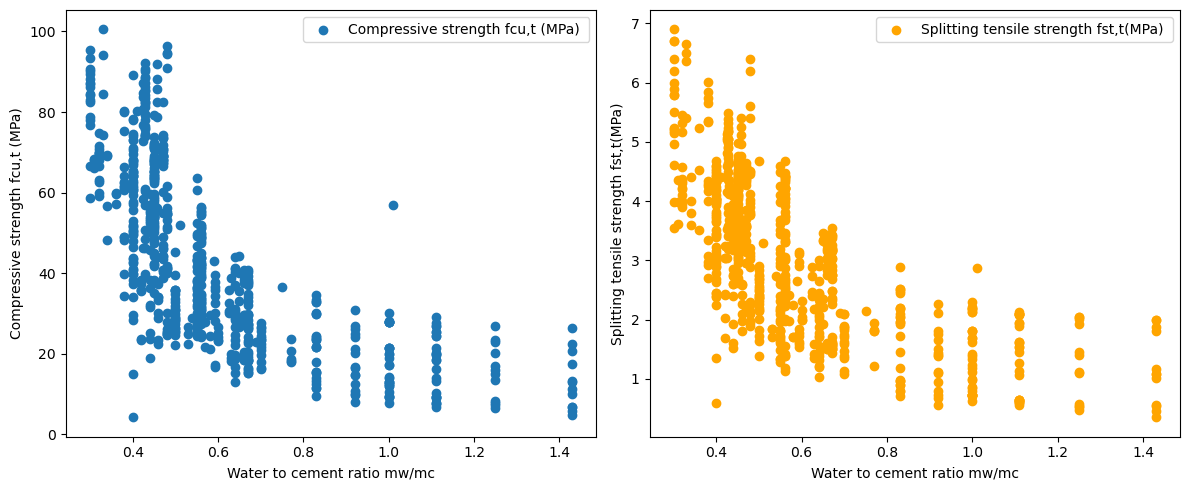

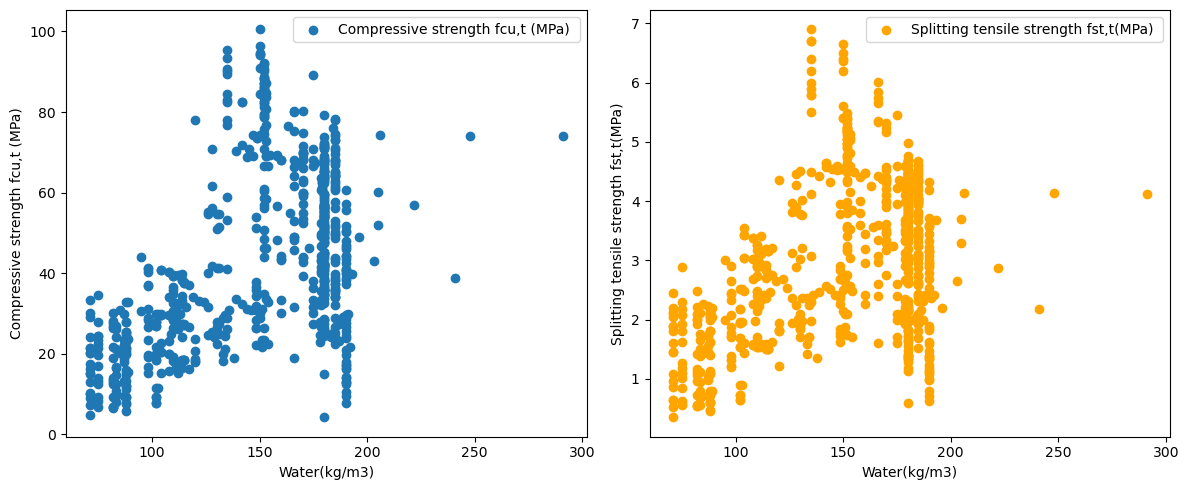

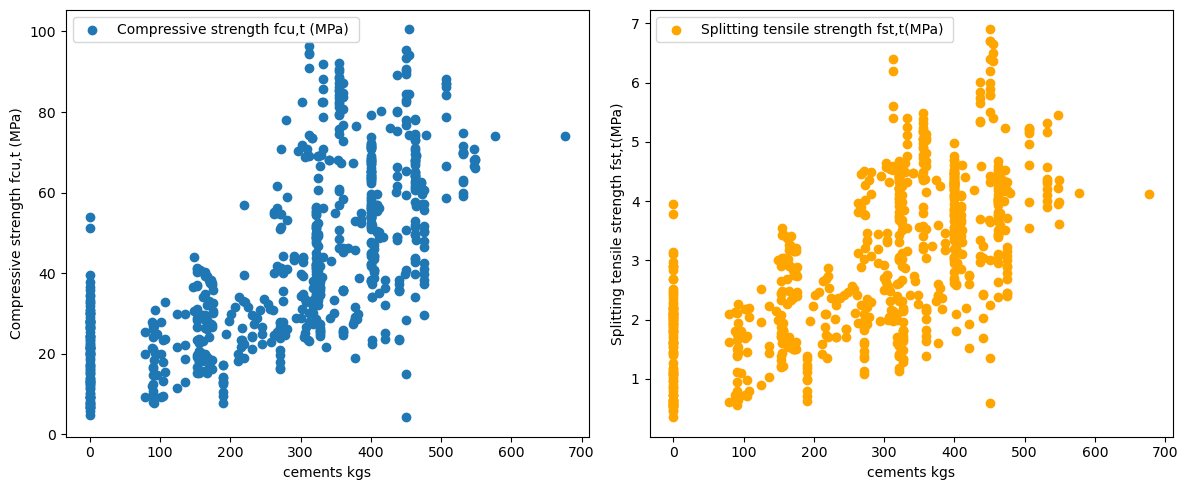

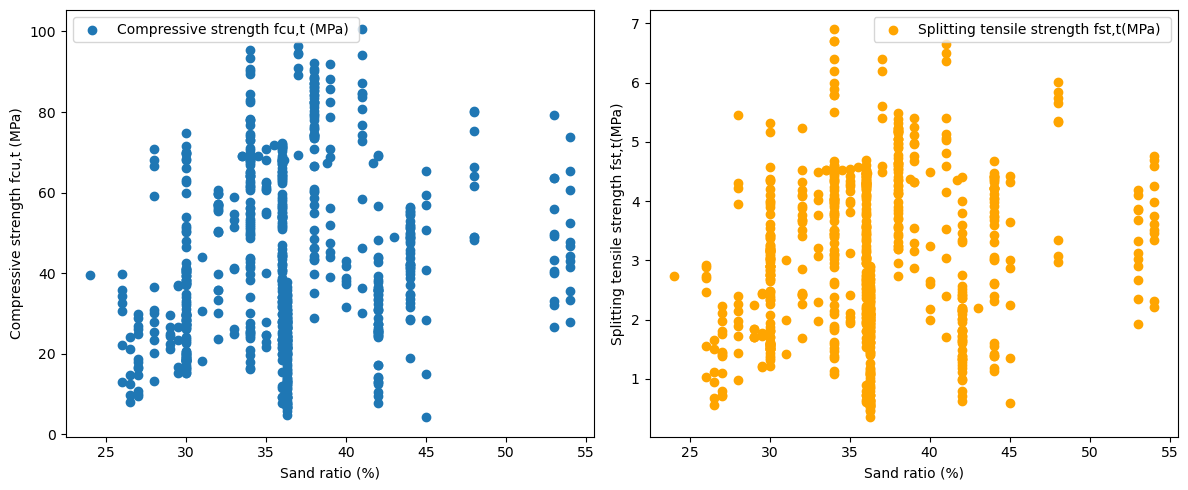

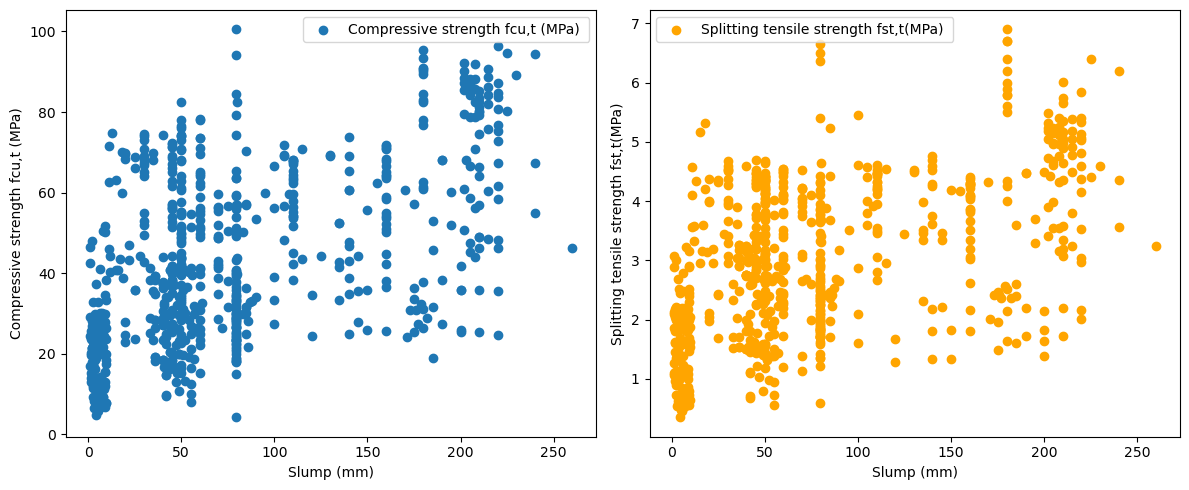

In [93]:
fig_size=fypdata.columns
a=0
b=1
print(f"Blue plots are for the relation with {fypdata.columns[12]}")
print(f"Orange plots are for the relation with {fypdata.columns[13]}")
print()
for i in range(len(data.columns)-2):
    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plot the first graph on the left subplot
    axes[a].scatter(data.iloc[:,i], data.iloc[:,12], label=f'{data.columns[12]} ')
    if b==1:
        axes[a].set_title(f'{data.columns[12]} graph')
    axes[a].set_xlabel(data.columns[i])
    axes[a].set_ylabel(data.columns[12])

    axes[a].legend()
    a=a+1
    # Plot the second graph on the right subplot
    axes[a].scatter(data.iloc[:,i], data.iloc[:,13], label=f'{data.columns[13]} ', color='orange')
    if b==1:
        axes[a].set_title(f'{data.columns[13]} graph')
    axes[a].set_xlabel(data.columns[i])
    axes[a].set_ylabel(data.columns[13])
    axes[a].legend()
    a=0
    b=2
    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()


## seperate the input and output coulumns

In [95]:
X = data.drop([data.columns[12], data.columns[13]], axis=1)
y = data[[data.columns[12], data.columns[13]]]

In [97]:
X

,Compressive strength of cement fce(MPa),Tensile strength of cement fct(MPa),Curing age(day),Dmax of Crushed stone(mm),Stone powder content in Sand (%),Fineness modulus of sand,W/B,Water to cement ratio mw/mc,Water(kg/m3),cements kgs,Sand ratio (%),Slump (mm)
0,46.80,8.000000,3.0,31.5,5.0,3.340000,0.56,0.56,180.00,321.428571,44.0,50.0
1,46.80,8.000000,3.0,31.5,9.0,3.270000,0.56,0.56,180.00,321.428571,44.0,70.0
2,46.80,8.000000,3.0,31.5,13.0,2.770000,0.56,0.56,180.00,321.428571,44.0,50.0
3,46.80,8.000000,7.0,31.5,5.0,3.340000,0.56,0.56,180.00,321.428571,44.0,50.0
4,46.80,8.000000,7.0,31.5,9.0,3.270000,0.56,0.56,180.00,321.428571,44.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
709,48.07,8.309271,28.0,12.0,19.2,2.938247,0.36,0.55,178.75,325.000000,54.0,140.0
710,48.07,8.309271,90.0,12.0,19.2,2.938247,0.36,0.55,178.75,325.000000,54.0,140.0
711,48.07,8.309271,7.0,12.0,19.2,2.938247,0.32,0.45,180.00,400.000000,54.0,140.0
712,48.07,8.309271,28.0,12.0,19.2,2.938247,0.32,0.45,180.00,400.000000,54.0,140.0


In [99]:
y

,"Compressive strength fcu,t (MPa)","Splitting tensile strength fst,t(MPa)"
0,32.50,1.18
1,28.70,1.13
2,28.50,1.56
3,33.50,1.39
4,34.90,1.38
...,...,...
709,46.85,4.25
710,60.65,4.59
711,47.71,3.75
712,65.37,4.69


In [101]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (571, 12)
X_test shape: (143, 12)
y_train shape: (571, 2)
y_test shape: (143, 2)


### XGBoost Model


In [109]:

#1 XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=500, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost R-squared score (Accuracy):", r2_score(y_test, y_pred_xgb))
print("XGBoost Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))


XGBoost R-squared score (Accuracy): 0.9338026164951163
XGBoost Mean Squared Error: 20.83504432424445


### Linear regression Model

In [113]:
#2 Linear regression Model

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
print("Linear regression R-squared score (Accuracy):", r2_score(y_test, y_pred_lin))
print("Linear regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))


Linear regression R-squared score (Accuracy): 0.7136601130645115
Linear regression Mean Squared Error: 65.64599975859502


## These are the equetion learnt. the input will be put in these equations and both the outputs will be calculated. As in linear regression the model learn an equetion.

In [120]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'model' is your trained linear regression model
# and 'X_train' is your training data with 12 features
# and 'y_train' is your training data with 2 outputs

# Train the model (for illustration purposes)
#model = LinearRegression().fit(X_train, y_train)

# Get the coefficients (weights) and intercept for each output
coefficients = lin_model.coef_
intercept = lin_model.intercept_

# Constructing the equation for each output
for output_idx in range(coefficients.shape[0]):
    equation = f"y{output_idx + 1} = "
    for i, coef in enumerate(coefficients[output_idx]):
        equation += f"({coef} * x{i + 1}) + "
    equation += f"({intercept[output_idx]})"
    print(f"Equation for output {output_idx + 1}: {equation}")
    print("\n")


Equation for output 1: y1 = (0.10310691357526593 * x1) + (-2.0658091854999543 * x2) + (0.09734280856384203 * x3) + (-0.10367312657789571 * x4) + (-0.24330365351046057 * x5) + (4.146897201419769 * x6) + (-55.585417738745896 * x7) + (-12.948619205462931 * x8) + (0.0007831024292482135 * x9) + (0.03327285321710849 * x10) + (-0.15467218289132723 * x11) + (0.04525732410214824 * x12) + (69.47870433842382)


Equation for output 2: y2 = (-0.0020563065582614977 * x1) + (-0.06633652484884424 * x2) + (0.005798681323715177 * x3) + (-0.0040910031778614376 * x4) + (-0.010800012031046967 * x5) + (0.4168347646134491 * x6) + (-2.640010013100361 * x7) + (-1.7723218234328437 * x8) + (-0.005101492168741303 * x9) + (0.0018702211879659033 * x10) + (0.01369236604575542 * x11) + (0.0009062771243244029 * x12) + (4.288816110814528)




### Lasso regression Model

In [122]:
#3 Lasso regression Model

Lasso_model = Lasso()
Lasso_model.fit(X_train, y_train)
y_pred_Lasso = Lasso_model.predict(X_test)
print("Lasso regression R-squared score (Accuracy):", r2_score(y_test, y_pred_Lasso))
print("Lasso regression Mean Squared Error:", mean_squared_error(y_test, y_pred_Lasso))


Lasso regression R-squared score (Accuracy): 0.6701521895955749
Lasso regression Mean Squared Error: 74.58207053882471


In [128]:
from sklearn.linear_model import Lasso
import numpy as np

# Assuming 'model' is your trained Lasso model
# Train the model (for illustration purposes)
# model = Lasso().fit(X_train, y_train)

# Get the coefficients (weights) and intercept for each output
coefficients = Lasso_model.coef_
intercept = Lasso_model.intercept_

# Constructing the equation for each output
for output_idx in range(coefficients.shape[0]):
    equation = f"y{output_idx + 1} = "
    for i, coef in enumerate(coefficients[output_idx]):
        equation += f"({coef} * x{i + 1}) + "
    equation += f"({intercept[output_idx]})"
    print(f"Equation for output {output_idx + 1}: {equation}")
    print("\n")


Equation for output 1: y1 = (-0.0 * x1) + (-0.0 * x2) + (0.10171307328363312 * x3) + (-0.2231879282276898 * x4) + (-0.31205871163161103 * x5) + (0.0 * x6) + (-0.0 * x7) + (-0.0 * x8) + (-0.19018544692834385 * x9) + (0.09227692782791175 * x10) + (-0.18927982933124735 * x11) + (0.07303506838806005 * x12) + (53.081463960770364)


Equation for output 2: y2 = (-0.0 * x1) + (-0.0 * x2) + (0.006016398634630627 * x3) + (-0.0076016979007920565 * x4) + (-0.0 * x5) + (0.0 * x6) + (-0.0 * x7) + (-0.0 * x8) + (-0.00961332607704861 * x9) + (0.00564582747089572 * x10) + (0.0 * x11) + (0.0036613535899584376 * x12) + (2.5029303672993586)




### Ridge regression Model

In [130]:
#4 Ridge regression Model
Ridge_model = Ridge()
Ridge_model.fit(X_train, y_train)
y_pred_Ridge = Ridge_model.predict(X_test)
print("Ridge regression R-squared score (Accuracy):", r2_score(y_test, y_pred_Ridge))
print("Ridge regression Mean Squared Error:", mean_squared_error(y_test, y_pred_Ridge))


Ridge regression R-squared score (Accuracy): 0.7057404884750895
Ridge regression Mean Squared Error: 68.2237844763289


In [133]:
from sklearn.linear_model import Ridge
import numpy as np

# Assuming 'model' is your trained Ridge model
# Train the model (for illustration purposes)
# model = Ridge().fit(X_train, y_train)

# Get the coefficients (weights) and intercept for each output
coefficients = Ridge_model.coef_
intercept = Ridge_model.intercept_

# Constructing the equation for each output
for output_idx in range(coefficients.shape[0]):
    equation = f"y{output_idx + 1} = "
    for i, coef in enumerate(coefficients[output_idx]):
        equation += f"({coef} * x{i + 1}) + "
    equation += f"({intercept[output_idx]})"
    print(f"Equation for output {output_idx + 1}: {equation}")
    print("\n")


Equation for output 1: y1 = (0.15266896943900501 * x1) + (-2.3064641836553514 * x2) + (0.09772934301277958 * x3) + (-0.13610259301258126 * x4) + (-0.2620620635363138 * x5) + (3.4875451872419765 * x6) + (-39.499269025787406 * x7) + (-15.901429116607096 * x8) + (-0.057181806245950734 * x9) + (0.044098030234218814 * x10) + (-0.12382861231268665 * x11) + (0.04834886773854401 * x12) + (71.1043171352591)


Equation for output 2: y2 = (-0.0017724210497378702 * x1) + (-0.06470853469080452 * x2) + (0.005822496407917779 * x3) + (-0.00554639981144733 * x4) + (-0.011743676159302444 * x5) + (0.38037583565336025 * x6) + (-1.9756150164280848 * x7) + (-1.7408602741161239 * x8) + (-0.007442312399725266 * x9) + (0.002456174951017934 * x10) + (0.013648867709649837 * x11) + (0.001148214711673501 * x12) + (4.282733809734608)




### RandomForest regression Model


In [135]:
#5 RandomForest regression Model
RandomForest_model = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForest_model.fit(X_train, y_train)
y_pred_RandomForest = RandomForest_model.predict(X_test)
print("RandomForest regression R-squared score (Accuracy):", r2_score(y_test, y_pred_RandomForest))
print("RandomForest regression Mean Squared Error:", mean_squared_error(y_test, y_pred_RandomForest))


RandomForest regression R-squared score (Accuracy): 0.8650630984518256
RandomForest regression Mean Squared Error: 34.128057497571305


### K-Nearest Neighbors (KNN) Regression


In [137]:
#6 K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors (KNN) R-squared score (Accuracy):", r2_score(y_test, y_pred_knn))
print("K-Nearest Neighbors (KNN) Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) R-squared score (Accuracy): 0.8288563541596687
K-Nearest Neighbors (KNN) Mean Squared Error: 36.56881341258739


In [143]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
for i in range(12):
    # Assuming 'model' is your trained k-NN model
    # Find the k-neighbors for a single data point
    distances, indices = knn_model.kneighbors([X_test.iloc[i]])

    print("Indices of Neighbors:",i+1, "=", indices)
    print("Distances of Neighbors:", distances)
    print("Neighbor values:", np.array(y_train)[indices])


Indices of Neighbors: 1 = [[384 562 143 376 320]]
Distances of Neighbors: [[21.54819946 30.26557285 60.         60.         63.75205801]]
Neighbor values: [[[67.8   3.99]
  [69.6   4.33]
  [67.3   4.37]
  [73.    4.55]
  [64.    4.03]]]
Indices of Neighbors: 2 = [[374 106 559  24 333]]
Distances of Neighbors: [[ 0.          0.         21.         52.53028885 53.0757124 ]]
Neighbor values: [[[93.5   6.7 ]
  [90.6   6.4 ]
  [82.4   5.8 ]
  [61.3   4.25]
  [60.8   4.01]]]
Indices of Neighbors: 3 = [[332  74 250 255 215]]
Distances of Neighbors: [[ 4.          7.         21.         28.         28.28673346]]
Neighbor values: [[[38.4   2.67]
  [44.9   3.06]
  [54.2   3.46]
  [51.6   3.49]
  [56.3   4.61]]]
Indices of Neighbors: 4 = [[152 382 265 113 135]]
Distances of Neighbors: [[12.96442941 21.         23.21181794 23.61956231 24.67947386]]
Neighbor values: [[[72.7   4.15]
  [60.4   3.8 ]
  [56.9   3.58]
  [70.7   4.32]
  [58.5   3.53]]]
Indices of Neighbors: 5 = [[150 393 474 352  36]]
Di

### So XGBoost regression have the higher accuracy among all of the model above, therefore we will select the XGB and save this model to load and use it later

In [145]:
xgb_model.save_model("my_xgb_model.xgb")

### The following cell will creat a UI (user interface) and load the saved model and then will predict the values of compressive strength and splitting tensile strength of the cements. 

In [147]:

# Load your XGBoost model
# Replace 'your_model_filename.xgb' with the actual filename of your XGBoost model
xgb_model = xgb.Booster()
xgb_model.load_model('my_xgb_model.xgb')


# Create a function to make predictions
def make_predictions():
    # Get input values from entry widgets
    input_values = [float(entry.get()) if entry.get() else 0.0 for entry in entry_widgets]

    # Create a DataFrame with the input values
    new_data = pd.DataFrame([input_values], columns=input_columns)

    # Make predictions with the XGBoost model
    predictions = xgb_model.predict(xgb.DMatrix(new_data))

    # Display the predictions on the interface
    for i, col_name in enumerate(output_columns):
        prediction_value = float(predictions[0,i])
        prediction_labels[i].config(text=f"{col_name}: {prediction_value:.2f}")
        #prediction_labels[i].config(text=f"{col_name}: {predictions[i]:.2f}")

# Create the main GUI window
root = tk.Tk()
root.title("XGBoost Model Predictor")

# Specify the column names for input and output
input_columns = ['Compressive strength of cement fce(MPa)',
                 'Tensile strength of cement fct(MPa)', 'Curing age(day)',
                 'Dmax of Crushed stone(mm)', 'Stone powder content in Sand (%)',
                 'Fineness modulus of sand', 'W/B', 'Water to cement ratio mw/mc',
                 'Water(kg/m3)', 'cements kgs', 'Sand ratio (%)', 'Slump (mm)']

output_columns = ['Compressive strength fcu,t (MPa)', 'Splitting tensile strength fst,t(MPa)']

# Create labels and entry widgets for input
label_widgets = [ttk.Label(root, text=col_name) for col_name in input_columns]
entry_widgets = [ttk.Entry(root) for _ in input_columns]

# Place labels and entry widgets in the GUI
for i, (label, entry) in enumerate(zip(label_widgets, entry_widgets)):
    label.grid(row=i, column=0, padx=10, pady=5, sticky="w")
    entry.grid(row=i, column=1, padx=10, pady=5)

# Create a button to make predictions
predict_button = ttk.Button(root, text="Predict", command=make_predictions)
predict_button.grid(row=len(input_columns), column=0, columnspan=2, pady=10)

# Create labels to display predictions
prediction_labels = [ttk.Label(root, text=f"{col_name}: N/A") for col_name in output_columns]
for i, label in enumerate(prediction_labels):
    label.grid(row=i + len(input_columns) + 1, column=0, columnspan=2, pady=5)

# Run the GUI
root.mainloop()
